In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import csv
import random
import math
import operator
from numpy import linalg as LA
import sys
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import linear_model

In [2]:
df = pd.read_csv('AdmissionDataset/data.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


In [4]:
def MSE(theta,bias,X,Y,l):
    temp=np.dot(X,theta)
    Htheta=temp+bias
    t1=np.sum((Htheta-Y)**2)
    return (0.5/len(X))*(t1)

In [5]:
def cost_func(theta,bias,X,Y,l):
    temp=np.dot(X,theta)
    Htheta=temp+bias
    t1=np.sum((Htheta-Y)**2)
    t2=l*np.sum(theta**2)
    return (0.5/len(X))*(t1+t2)

In [6]:
def grad_des(X,Y,lr,epochs,l):
    theta=np.zeros((X.shape[1],1))
    bias=0
    for e in range(epochs):
        temp=np.dot(X,theta)
        Htheta=temp+bias
        db=np.sum(Htheta-Y)
        dtheta=np.dot(X.T,(Htheta-Y))
        ridge_diff=dtheta+l*theta
        bias=bias-(lr/len(X)*db)
        theta=theta-(lr/len(X)*ridge_diff)
#         if e%10==0:
#             print("Cost at epoch "+ str(e) +" is- "+ str(cost_func(theta,bias,X,Y,l)))
    return theta,bias

In [7]:
kf = KFold(n_splits=2)

In [8]:
kf
df = df.drop('Serial No.',axis=1)
y = df['Chance of Admit ']
X = df.drop('Chance of Admit ', axis=1)

In [9]:
y = np.array(y)
X = np.array(X)
X=(X-X.mean(axis=0))/X.std(axis=0)
y=y.reshape((len(y),1))

In [10]:
y.shape

(450, 1)

### K-Fold Cross Validation:-

In [14]:
elist=[]
for k in [2,3,5,6,9,10,15,18,25,30,45,50,75,90,150,225,450]:
    me=0
    err=0
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
#         print(X_test.shape)
#         print(X_train.shape)
        theta,bias=grad_des(X_train,y_train,0.1,1000,20)
        err=MSE(theta,bias,X_test,y_test,20)
        me+=err
    print("k-value: ",k," & Error:", me/k)
    elist.append(me/k)

k-value:  2  & Error: 0.0019450760992314289
k-value:  3  & Error: 0.00192135971492319
k-value:  5  & Error: 0.0018981444174981156
k-value:  6  & Error: 0.0018866037250186455
k-value:  9  & Error: 0.001887804820737927
k-value:  10  & Error: 0.0018971340893848617
k-value:  15  & Error: 0.0018848194379811544
k-value:  18  & Error: 0.001884280330075581
k-value:  25  & Error: 0.0018870843833773453
k-value:  30  & Error: 0.0018887368507337712
k-value:  45  & Error: 0.0018895391162539873
k-value:  50  & Error: 0.0018961409983731727
k-value:  75  & Error: 0.0018887426831032566
k-value:  90  & Error: 0.0018954833671672782
k-value:  150  & Error: 0.0018946235610435428
k-value:  225  & Error: 0.0018930855300329588
k-value:  450  & Error: 0.0018937019470787238


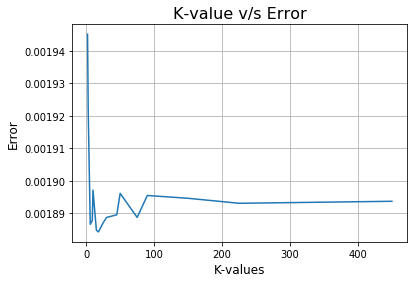

In [15]:
k_val=[2,3,5,6,9,10,15,18,25,30,45,50,75,90,150,225,450]
import matplotlib.pyplot as plt
plt.plot(k_val,elist)
plt.xlabel('K-values',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.title('K-value v/s Error',fontsize=16)
plt.grid(True)
plt.show()

### Leave-one-out Cross Validation:-

In [19]:
lv = KFold(n_splits=450)
me=0
err=0
for train_index, test_index in lv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    theta,bias=grad_des(X_train,y_train,0.1,1000,15)
    err=MSE(theta,bias,X_test,y_test,20)
    me+=err
print("Error in Leave one out Cross Validation: ", me/k)

Error in Leave one out Cross Validation:  0.0018915265078479242
